<a href="https://colab.research.google.com/github/adib2006/Knight-in-Training/blob/master/Day5__Classification_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Evaluation


# Today's topics

1.   Regularization with Logistic Regression
2.   Model Evaluation w/ Classification



# Review: Regularization in Linear Regression

Remember: the goal of regularization is to minimize the loss function (minimize the error of our predicted values vs. the actual values) Linear regression uses lasso and ridge regularization. So what about logistic regression?

# Regularization with Logistic Regression

We can do a similar process to linear regression regularization by adding a penalty to our loss function that penalizes extreme values. The result is the same—shrink parameters that contain these extremeties towards zero.

Let's see this in action!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

url = 'https://drive.google.com/uc?id=1oakZCv7g3mlmCSdv9J8kdSaqO5_6dIOw'
dataset = pd.read_csv(url)


In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


So we've loaded in and looked at our dataset, so let's do some logistic regression!

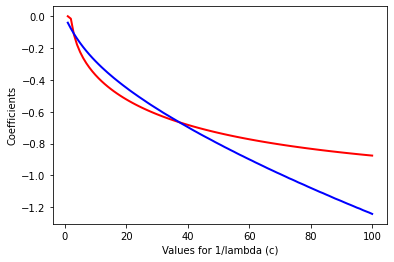

In [ ]:
from sklearn.linear_model import LogisticRegression as lr

lr_l1 = [] #l1 regularization
lr_l2 = [] #l2 regularization
c_list = [i for i in range(1,101)]

for i in range(1,101):
  c = i/100 # c is just 1 / lambda

  logreg_l1 = lr(C=c, penalty='l1',solver='liblinear',max_iter=1000)
  logreg_l1.fit(X_train, y_train)
  lr_l1.append(logreg_l1.coef_[0])

  logreg_l2 = lr(C=c, penalty='l2',max_iter=1000)
  logreg_l2.fit(X_train, y_train)
  lr_l2.append(logreg_l2.coef_[0])

plt.plot(c_list, lr_l1, color='red', lw=2)
plt.plot(c_list, lr_l2, color='blue', lw=2)
plt.xlabel('Values for 1/lambda (c)')
plt.ylabel('Coefficients')
plt.show()


**So what happens as we increase our value for c (decrease lambda)?** Answer: As you increase the value for c, the coefficients get smaller.

#Classification

## What is it?
Classification is the process of grouping data points into certain pre-defined clusters (determined by the class label attribute).

## Steps for classification
1. Model Construction - Class label attributes (what are our different categories?)
2. Model Selection - How is the accuracy of our model in predicting which class a datapoint is in?
3. Model Usage - If our model is acceptable, predict the classification of new data points!

## Classification Model Evaluation

We can evaluate our classification models in several ways. A common method is by using a validation set to test accuracy rather than the training set. There is also: holdout method, random subsampling, cross-validation.

### Holdout method
Randomly partition the dataset into 2 independent sets for training and validating our model

### Random Subsampling
Randomly splitting our dataset into k subsets for training and validation. This is basically like doing the holdout method a k number of times. The accuracy becomes the average of the accuracies obtained from the different subsets.

### Cross validation (kfold)
Randomly partition the data into k mutually exclusive subsets all around the same size. Each iteration, choose one set as the test and the rest as training sets. 

Let's try out some classification with code!

In [ ]:
dataset = pd.read_csv("https://drive.google.com/uc?id=1fcd53Ksu7Kn-qF2UOogcd27RRn6iCzFP")
dataset.head(10)

,Midterm Grade,Student Type
0,95,A
1,78,B
2,75,C
3,70,D
4,88,A
5,40,D
6,100,A
7,80,C
8,80,B
9,20,D


We can group our data based on the class labels!

In [ ]:
print(dataset.groupby('Student Type').size())

Student Type
A    6
B    6
C    4
D    5
F    4
dtype: int64


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # we will learn about this later but it's a model we can use for classification

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.6666666666666666
0.42857142857142855


Let's compare the results of our classification prediction!

In [ ]:
predictions = knn.predict(X_test)

print(predictions)
print(y_test)

['F' 'B' 'C' 'C' 'A' 'F' 'C']
['D' 'B' 'D' 'C' 'B' 'F' 'B']


# Issues with Classification

Classification will not always be correct, so we can partition the results into 4 categories.

1. True positives (classified as True correctly)
2. True negatives (classified as False correctly)
3. False positives (classified as True when it is really False)
4. False negatives (classified as False when it is really True)

**Let's take a look at an example!**

A patient has covid but gets a result saying they are negative for Covid.

An innocent civilian is not identified as a criminal by an AI face monitoring program.

An image analysis technology identifies a red blood cell as a red blood cell. 

A pregnancy test comes back as positive when the patient is not pregnant. 


We can represent this in a confusion matrix/with an ROC curve

Confusion Matrix Format:

> TP    FN

> FP    TN



In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predictions))

[[0 0 0 0 0]
 [1 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 1]
 [0 0 0 0 1]]


**Why is our confusion matrix 5x5?** Answer: There are 5 classes.

Accuracy = (TP + TN) / all

Error rate = (FP + FN) / all

Sensitivity = TP / (TP + FP)

Specificity = TN / (TN + FN)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions, target_names=['A','B','C','D','F']))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00         0
           B       1.00      0.33      0.50         3
           C       0.33      1.00      0.50         1
           D       0.00      0.00      0.00         2
           F       0.50      1.00      0.67         1

    accuracy                           0.43         7
   macro avg       0.37      0.47      0.33         7
weighted avg       0.55      0.43      0.38         7



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
